# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Download the data set using the following command:

``curl -X GET https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz -o data/video_games.tsv.gz``

Then create a subfolder called "data" and move the dataset there. No need to decompress the dataset.

In [3]:
# read data into pandas dataframe
path = "data/video_games.tsv.gz"
video_games = pd.read_csv(path, sep="\t", verbose=True, parse_dates=[14], on_bad_lines="skip")

Tokenization took: 398.79 ms
Type conversion took: 200.42 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 408.81 ms
Type conversion took: 242.97 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 368.23 ms
Type conversion took: 214.35 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 354.90 ms
Type conversion took: 198.79 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 299.12 ms
Type conversion took: 208.24 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 346.16 ms
Type conversion took: 219.41 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 389.42 ms
Type conversion took: 237.65 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 323.93 ms
Type conversion took: 226.35 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 418.05 ms
Type conversion took: 245.18 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 417.89 ms
Type conversion took: 325.15 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 419.73 ms
T

The data set consists of roughly 1.8 million Amazon reviews in form of texts, star ratings and further information on the associated products. All reviews originate from the US marketplace, thus the review texts are expected to be written in English. Every review contains the product description of the item and an identifier of the item. The review texts are split in a headline and a body. They are accompanied by star ratings in the discrete value range of one to five stars. Further attributes are an identifier of the customer, the date of the review, helpfulness votes by other users and flags that signal verified purchases and purchases in the context of the Amazon Vine product testing program.

In [4]:
# check data types
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780268 entries, 0 to 1780267
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int64         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int64         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        int64         
 8   helpful_votes      int64         
 9   total_votes        int64         
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 203.7+ MB


In [5]:
video_games.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


Most columns do not have missing values, only the review headline, body and date columns have missing values. Still the number of missing values in these columns compared to the dataset size is small.

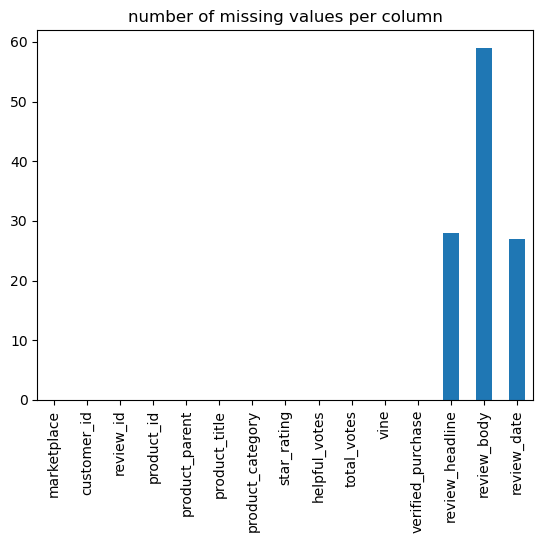

In [6]:
# bar plot showing number of missing values per column
video_games.isna().sum().plot(kind='bar', title='number of missing values per column')

plt.show()

There are no reviews where both the headline and body of the review are missing.

In [7]:
# number of reviews where both the review headline and body are missing
len(video_games[video_games["review_headline"].isna() & video_games["review_body"].isna()])

0

The most common star rating is five stars, followed by four, one, three and two stars.

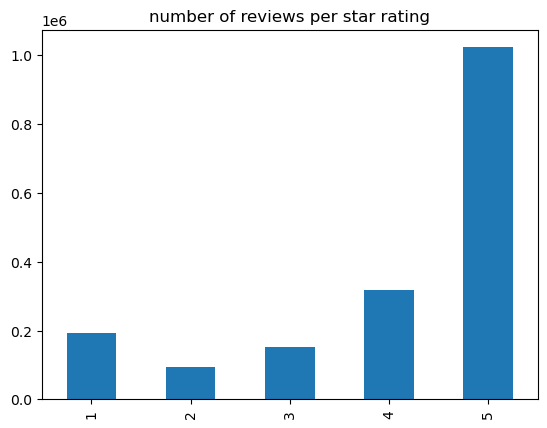

In [8]:
# bar plot number of reviews per star rating
video_games["star_rating"].value_counts().sort_index().plot(kind="bar", title="number of reviews per star rating")

plt.show()

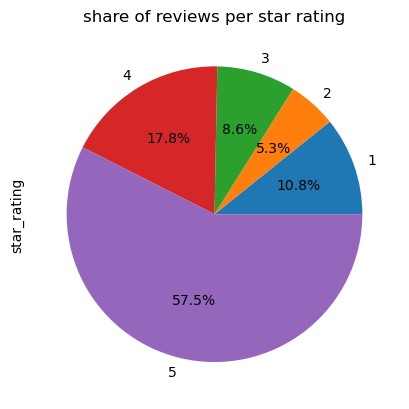

In [9]:
# bar plot number of reviews per star rating
video_games["star_rating"].value_counts().sort_index().plot(kind="pie", autopct='%1.1f%%', title="share of reviews per star rating")

plt.show()

The first review is from November 1997 while the last one is from August 2015.

In [10]:
# first and last review date
video_games["review_date"].agg(["min", "max"])

min   1997-11-06
max   2015-08-31
Name: review_date, dtype: datetime64[ns]

The number of reviews generally increases by year, with the exception of the years between 2001 and 2006, where the number of reviews decreases. Overall there are a lot more reviews from the later years in the time period.

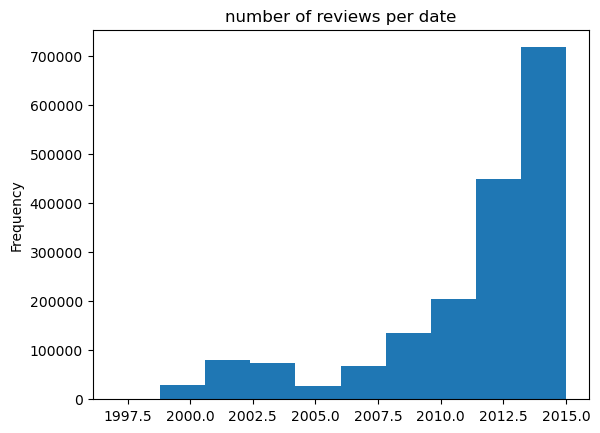

In [11]:
# histogram of number of reviews per date
fig, ax = plt.subplots()
video_games["review_date"].dt.year.plot(kind="hist", title="number of reviews per date", ax=ax)

plt.show()

Most customers only wrote one review, but there are also cutomers that wrote hundreds of reviews.

In [12]:
# number of reviews per customer
video_games["customer_id"].value_counts().describe()

count    1.043108e+06
mean     1.706696e+00
std      3.349919e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.090000e+02
Name: customer_id, dtype: float64

Only a small part of the reviews (0.2%) were written in the context of vine product tests.

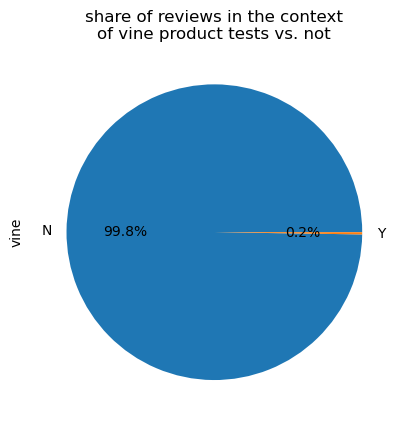

In [13]:
# number of reviews that were made in the context of vine product tests vs. not
video_games["vine"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="share of reviews in the context\nof vine product tests vs. not")

plt.show()

The majority (65.4%) of purchases are verified.

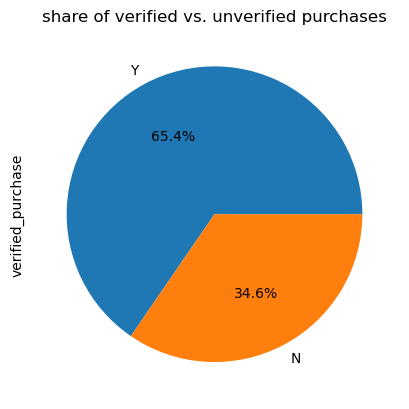

In [14]:
# number of verified vs. unverified purchases
video_games["verified_purchase"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="share of verified vs. unverified purchases")

plt.show()

While most reviews were not voted to be helpful, some reviews did achieve up to about 10000 "helpful" votes.

In [15]:
# summary nummer of helpful votes
video_games["helpful_votes"].describe()

count    1.780268e+06
mean     2.263971e+00
std      1.919211e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.049800e+04
Name: helpful_votes, dtype: float64

The distribution of total number of votes is similar to the distribution of the number of "helpful" votes, only with slightly higher values. Still a lot of reviews did not achieve a negative vote as well.

In [16]:
# summary nummer of total votes
video_games["total_votes"].describe()

count    1.780268e+06
mean     3.764128e+00
std      2.247177e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.078000e+04
Name: total_votes, dtype: float64

In [21]:
# summary number of characters in the review headlines
video_games["review_headline"].str.len().describe()

count    1.780240e+06
mean     2.358589e+01
std      3.052170e+02
min      1.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      3.000000e+01
max      2.056460e+05
Name: review_headline, dtype: float64

In [23]:
# summary number of characters in the review bodies
video_games["review_body"].str.len().describe()

count    1.780209e+06
mean     5.349339e+02
std      1.061615e+03
min      1.000000e+00
25%      1.060000e+02
50%      2.100000e+02
75%      5.400000e+02
max      4.666400e+04
Name: review_body, dtype: float64